In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv("OLX_cars_dataset00.csv")
df.head()

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
0,1079071571,fresh import Passo 2021model,Toyota,Passo,2021,54000,4190000,Petrol,Unregistered,Original,Imported,Automatic,Used,"Airline Avenue, Islamabad","it's 2021 model fresh import, perfect engine s...","ABS, Air Bags, AM/FM Radio, CD Player, Cassett...",['https://images.olx.com.pk/thumbnails/4039460...,https://www.olx.com.pk/item/fresh-import-passo...
1,1080125520,Suzuki ravi,Suzuki,Ravi,2018,95000,1300000,Petrol,Karachi,Original,Local,Manual,Used,"Kahuta, Rawalpindi",Suzuki ravi 2018 col,AM/FM Radio,['https://images.olx.com.pk/thumbnails/4102504...,https://www.olx.com.pk/item/suzuki-ravi-iid-10...
2,1080748789,Suzuki bolan 2015 contact 03112271054,Suzuki,Bolan,2015,50000,800000,Petrol,Karachi,Original,Local,Manual,Used,"Lyari Expressway, Karachi",Suzuki bolan model 2015 reg 2022 ghadi me koi ...,Rear speakers,['https://images.olx.com.pk/thumbnails/4139520...,https://www.olx.com.pk/item/suzuki-bolan-2015-...
3,1076081635,Diahatsu Move 2013,Daihatsu,Move,2013,94000,2155000,Petrol,Lahore,Original,Imported,Automatic,Used,"New Amir Town, Lahore",Move Push start \nHome Used car. \nModel 2013....,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/3865337...,https://www.olx.com.pk/item/diahatsu-move-2013...
4,1080812928,Suzuki Swift DLX 2011 miner tuchap,Suzuki,Swift,2011,126544,1440000,Petrol,Karachi,Original,Local,Manual,Used,"Shadman 2, Karachi",Suzuki Swift DLX\nAbS Break 100%\nengine 100%\...,"ABS, Air Conditioning, Alloy Rims, AM/FM Radio...",['https://images.olx.com.pk/thumbnails/4143509...,https://www.olx.com.pk/item/suzuki-swift-dlx-2...


In [3]:
df.shape

(9179, 18)

In [4]:
df.drop(["Images URL's","Car Profile"],axis=1,inplace=True)

In [5]:
df.head()

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features
0,1079071571,fresh import Passo 2021model,Toyota,Passo,2021,54000,4190000,Petrol,Unregistered,Original,Imported,Automatic,Used,"Airline Avenue, Islamabad","it's 2021 model fresh import, perfect engine s...","ABS, Air Bags, AM/FM Radio, CD Player, Cassett..."
1,1080125520,Suzuki ravi,Suzuki,Ravi,2018,95000,1300000,Petrol,Karachi,Original,Local,Manual,Used,"Kahuta, Rawalpindi",Suzuki ravi 2018 col,AM/FM Radio
2,1080748789,Suzuki bolan 2015 contact 03112271054,Suzuki,Bolan,2015,50000,800000,Petrol,Karachi,Original,Local,Manual,Used,"Lyari Expressway, Karachi",Suzuki bolan model 2015 reg 2022 ghadi me koi ...,Rear speakers
3,1076081635,Diahatsu Move 2013,Daihatsu,Move,2013,94000,2155000,Petrol,Lahore,Original,Imported,Automatic,Used,"New Amir Town, Lahore",Move Push start \nHome Used car. \nModel 2013....,"ABS, Air Bags, Air Conditioning, Alloy Rims, A..."
4,1080812928,Suzuki Swift DLX 2011 miner tuchap,Suzuki,Swift,2011,126544,1440000,Petrol,Karachi,Original,Local,Manual,Used,"Shadman 2, Karachi",Suzuki Swift DLX\nAbS Break 100%\nengine 100%\...,"ABS, Air Conditioning, Alloy Rims, AM/FM Radio..."


In [6]:
df.isnull().sum()

Ad ID                0
Car Name             0
Make                 0
Model                0
Year                 0
KM's driven          0
Price                0
Fuel                 0
Registration city    0
Car documents        0
Assembly             0
Transmission         0
Condition            0
Seller Location      0
Description          0
Car Features         0
dtype: int64

In [12]:

df["Description"] = df["Description"].str.replace("[^a-zA-Z0-9\s]", "")
df["Car Features"] = pd.to_numeric(df["Car Features"], errors='coerce')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ad ID              9179 non-null   int64  
 1   Car Name           9179 non-null   object 
 2   Make               9179 non-null   object 
 3   Model              9179 non-null   object 
 4   Year               9179 non-null   int64  
 5   KM's driven        9179 non-null   int64  
 6   Price              9179 non-null   int64  
 7   Fuel               9179 non-null   object 
 8   Registration city  9179 non-null   object 
 9   Car documents      9179 non-null   object 
 10  Assembly           9179 non-null   object 
 11  Transmission       9179 non-null   object 
 12  Condition          9179 non-null   object 
 13  Seller Location    9179 non-null   object 
 14  Description        9179 non-null   object 
 15  Car Features       0 non-null      float64
dtypes: float64(1), int64(4),

In [22]:
df.head()

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description
0,1079071571,6574,10,44,2021,54000,4190000,3,57,1,0,0,0,92,7367
1,1080125520,4830,9,47,2018,95000,1300000,3,25,1,1,1,0,1399,5079
2,1080748789,4686,9,4,2015,50000,800000,3,25,1,1,1,0,1614,4992
3,1076081635,1509,2,42,2013,94000,2155000,3,30,1,0,0,0,1904,3969
4,1080812928,4482,9,52,2011,126544,1440000,3,25,1,1,1,0,2447,4852


In [23]:
encoder= LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head()

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description
0,1079071571,6574,10,44,2021,54000,4190000,3,57,1,0,0,0,92,7367
1,1080125520,4830,9,47,2018,95000,1300000,3,25,1,1,1,0,1399,5079
2,1080748789,4686,9,4,2015,50000,800000,3,25,1,1,1,0,1614,4992
3,1076081635,1509,2,42,2013,94000,2155000,3,30,1,0,0,0,1904,3969
4,1080812928,4482,9,52,2011,126544,1440000,3,25,1,1,1,0,2447,4852


In [24]:
## splitting the dataset between x and y, x(independent) which are multiple variable and y (dependent) which is only
## one variable
X=df.drop(["Price"],axis=1)
y=df["Price"]

In [25]:
X.head()

,Ad ID,Car Name,Make,Model,Year,KM's driven,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description
0,1079071571,6574,10,44,2021,54000,3,57,1,0,0,0,92,7367
1,1080125520,4830,9,47,2018,95000,3,25,1,1,1,0,1399,5079
2,1080748789,4686,9,4,2015,50000,3,25,1,1,1,0,1614,4992
3,1076081635,1509,2,42,2013,94000,3,30,1,0,0,0,1904,3969
4,1080812928,4482,9,52,2011,126544,3,25,1,1,1,0,2447,4852


In [26]:
y.head()

0    4190000
1    1300000
2     800000
3    2155000
4    1440000
Name: Price, dtype: int64

In [19]:
df.drop(["Car Features"],axis=1,inplace=True)

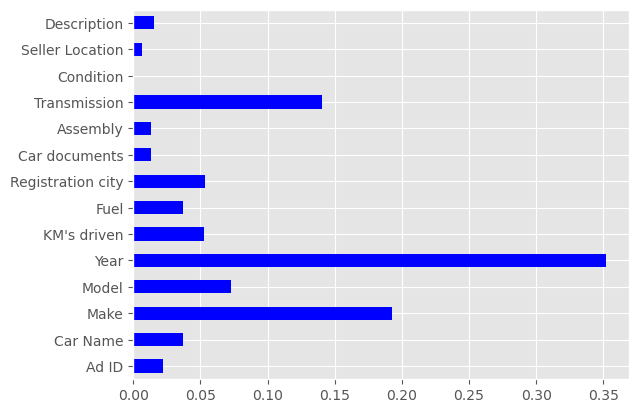

In [27]:
## the mutual importance between each features
plt.style.use("ggplot")
importance= mutual_info_regression(X,y)
feature_impo=pd.Series(importance,X.columns[0:len(X.columns)])
feature_impo.plot(kind="barh",color="blue")
plt.show()

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y, test_size=0.2,random_state=1)

In [29]:
LinearModel=Pipeline([("Scaler",StandardScaler()),("Regression",LinearRegression())])
LinearModel.fit(xtrain,ytrain)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Regression', LinearRegression())])

In [30]:
pred=LinearModel.predict(xtest)
pred

array([1582801.51501149, 3430768.67184309, 3245964.79254227, ...,
       1555413.35183933, 1853125.21560675, 1182059.42761163])

In [31]:
print("MAE",mean_absolute_error(ytest,pred))
print("MAPE",mean_absolute_percentage_error(ytest,pred))
print("MSE",mean_squared_error(ytest,pred))
print("R2 SCORE",r2_score(ytest,pred))

MAE 578844.7734357126
MAPE 0.378370585920468
MSE 514780688141.541
R2 SCORE 0.620277752387699


In [32]:
outcome= { 
    "Actual price":ytest,
    "Predicted price":pred

}
df3=pd.DataFrame(outcome)
df3

,Actual price,Predicted price
5954,2000000,1.582802e+06
2403,3480000,3.430769e+06
552,2570000,3.245965e+06
4950,2750000,2.534495e+06
481,4300000,2.308231e+06
...,...,...
4604,4500000,3.510498e+06
7977,3200000,2.265555e+06
9009,1250000,1.555413e+06
4865,750000,1.853125e+06


<Axes: xlabel='Price'>

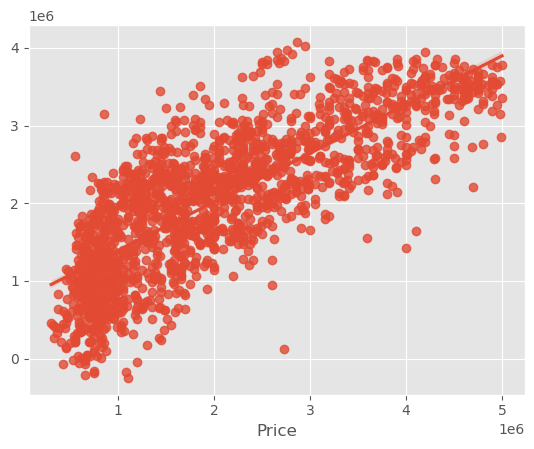

In [41]:
sns.regplot(x= ytest,y=pred)

In [33]:
tree=DecisionTreeRegressor()
tree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [34]:
pred1=tree.predict(xtest)
pred1

array([2000000., 3480000., 1750000., ..., 1490000.,  820000.,  850000.])

In [35]:
print("MAE",mean_absolute_error(ytest,pred1))
print("MAPE",mean_absolute_percentage_error(ytest,pred1))
print("MSE",mean_squared_error(ytest,pred1))
print("R2 SCORE",r2_score(ytest,pred1))

MAE 232387.75163398692
MAPE 0.1335993276783363
MSE 124222755441.23856
R2 SCORE 0.9083684664414399


In [36]:
outcome= { 
    "Actual price":ytest,
    "Predicted price":pred1

}
df3=pd.DataFrame(outcome)
df3

,Actual price,Predicted price
5954,2000000,2000000.0
2403,3480000,3480000.0
552,2570000,1750000.0
4950,2750000,3800000.0
481,4300000,4200000.0
...,...,...
4604,4500000,4500000.0
7977,3200000,2450000.0
9009,1250000,1490000.0
4865,750000,820000.0


<Axes: xlabel='Price'>

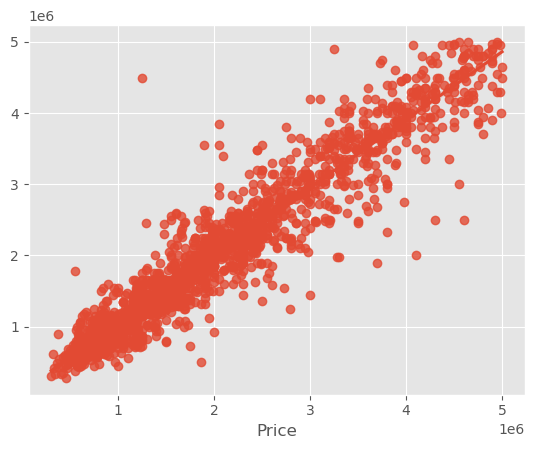

In [42]:
sns.regplot(x= ytest,y=pred1)

In [37]:
forest=RandomForestRegressor()
forest.fit(xtrain,ytrain)

RandomForestRegressor()

In [38]:
pred2=forest.predict(xtest)
pred2

array([2059600.  , 3518000.  , 2796249.99, ..., 1429180.  ,  942780.  ,
        786750.  ])

In [39]:
print("MAE",mean_absolute_error(ytest,pred2))
print("MAPE",mean_absolute_percentage_error(ytest,pred2))
print("MSE",mean_squared_error(ytest,pred2))
print("R2 SCORE",r2_score(ytest,pred2))

MAE 175840.08979302834
MAPE 0.10394037216730613
MSE 65226706202.79972
R2 SCORE 0.9518862458242329


In [40]:
outcome= { 
    "Actual price":ytest,
    "Predicted price":pred2

}
df3=pd.DataFrame(outcome)
df3

,Actual price,Predicted price
5954,2000000,2059600.00
2403,3480000,3518000.00
552,2570000,2796249.99
4950,2750000,2775020.00
481,4300000,4135150.00
...,...,...
4604,4500000,4183450.00
7977,3200000,2290150.00
9009,1250000,1429180.00
4865,750000,942780.00


<Axes: xlabel='Price'>

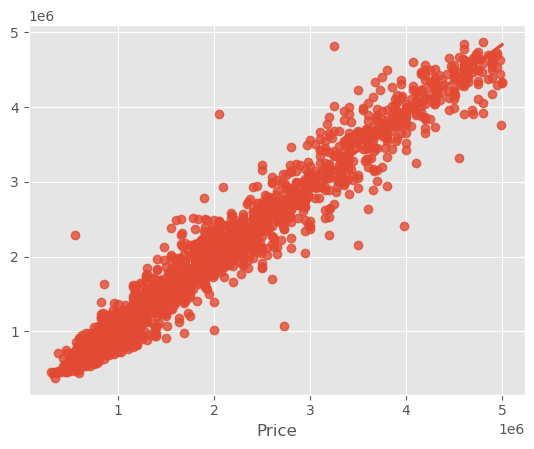

In [43]:
sns.regplot(x= ytest,y=pred2)

In [44]:
ml=MLPRegressor()
ml.fit(xtrain,ytrain)

MLPRegressor()

In [45]:
pred3=ml.predict(xtest)
pred3

array([2023887.83343727, 1980632.3603403 , 1990031.90940647, ...,
       1987226.73315146, 2002086.40768959, 1978168.43009525])

In [46]:
print("MAE",mean_absolute_error(ytest,pred3))
print("MAPE",mean_absolute_percentage_error(ytest,pred3))
print("MSE",mean_squared_error(ytest,pred3))
print("R2 SCORE",r2_score(ytest,pred3))

MAE 959652.5120649632
MAPE 0.6880168105311923
MSE 1363493932432.4783
R2 SCORE -0.00576613022949779


In [47]:
outcome= { 
    "Actual price":ytest,
    "Predicted price":pred3

}
df3=pd.DataFrame(outcome)
df3

,Actual price,Predicted price
5954,2000000,2.023888e+06
2403,3480000,1.980632e+06
552,2570000,1.990032e+06
4950,2750000,1.989609e+06
481,4300000,2.000413e+06
...,...,...
4604,4500000,1.992078e+06
7977,3200000,1.999227e+06
9009,1250000,1.987227e+06
4865,750000,2.002086e+06


<Axes: xlabel='Price'>

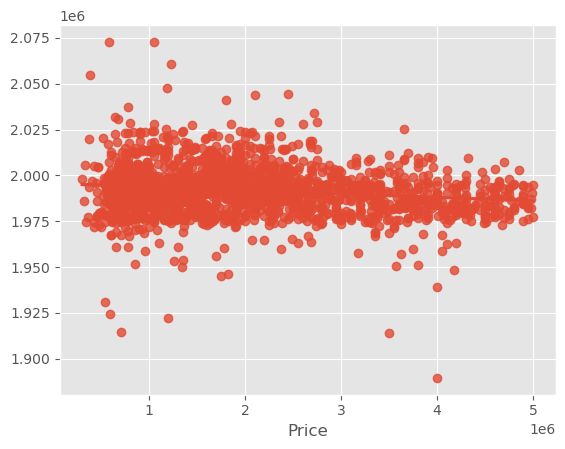

In [48]:
sns.regplot(x= ytest,y=pred3)

according to the test results shown with the different models the "RandomForestRegressor" shows higher accuracy 
percentage (95%) on this dataset.